In [1]:
import pandas as pd
from utilidades_graficas import *

In [2]:
archivo_resultados_double = pd.read_csv('op_double.csv')
archivo_resultados_double.platform.replace(['cuda', 'numpy', 'cl'], 
                                          ['cuda_dobule', 'numpy_double', 'opencl_double'], inplace=True)
archivo_resultados_double.drop('size_a_m', axis=1, inplace=True)
archivo_resultados_double.drop('size_b_m', axis=1, inplace=True)
archivo_resultados_double.drop('size_b_n', axis=1, inplace=True)
archivo_resultados_double.rename(columns={'size_a_n': 'size'}, inplace=True)
archivo_resultados_double.head()

,Unnamed: 0,platform,method,size,time
0,0,cuda_dobule,suma,500,0.052937
1,1,cuda_dobule,resta,500,0.002741
2,2,cuda_dobule,punto,500,0.009723
3,3,cuda_dobule,division,500,0.058886
4,4,cuda_dobule,multiplicacion,500,0.070138


In [3]:
archivo_resultados_float = pd.read_csv('op_float.csv')
archivo_resultados_float.platform.replace(['cuda', 'numpy', 'cl'], 
                                          ['cuda_float', 'numpy_float', 'opencl_float'], inplace=True)
archivo_resultados_float.drop('size_b', axis=1, inplace=True)
archivo_resultados_float.rename(columns={'size_a': 'size'}, inplace=True)
archivo_resultados_float.head()

,Unnamed: 0,platform,method,size,time
0,0,cuda_float,suma,500,0.062326
1,1,cuda_float,resta,500,0.001583
2,2,cuda_float,punto,500,0.004633
3,3,cuda_float,division,500,0.055548
4,4,cuda_float,multiplicacion,500,0.057410


In [4]:
archivo_resultados = archivo_resultados_float.append(archivo_resultados_double, ignore_index=True)
archivo_resultados.head()

,Unnamed: 0,platform,method,size,time
0,0,cuda_float,suma,500,0.062326
1,1,cuda_float,resta,500,0.001583
2,2,cuda_float,punto,500,0.004633
3,3,cuda_float,division,500,0.055548
4,4,cuda_float,multiplicacion,500,0.057410


In [5]:
plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'tiempo_promedio', 'std_tiempo']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size'] == tamaño]
            descripcion_tiempo = describir(tabla['time'])
           
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_tiempo ]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head()

,plataforma,metodo,tamaño,tiempo_promedio,std_tiempo
0,cuda_float,suma,500,0.062326,NaN
1,cuda_float,suma,1000,0.000969,NaN
2,cuda_float,suma,1500,0.001256,NaN
3,cuda_float,suma,2000,0.003496,NaN
4,cuda_float,suma,2500,0.001510,NaN


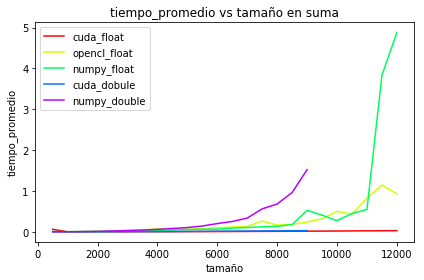

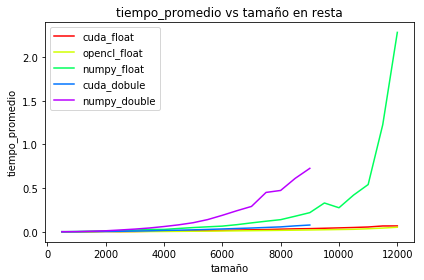

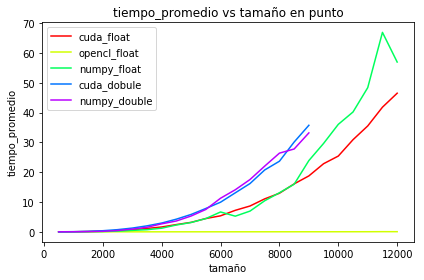

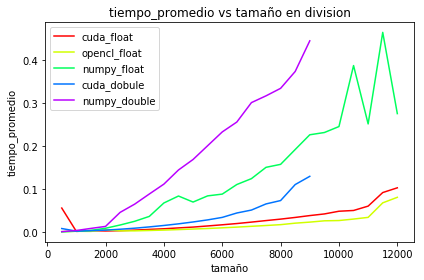

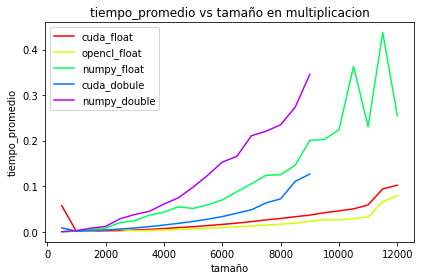

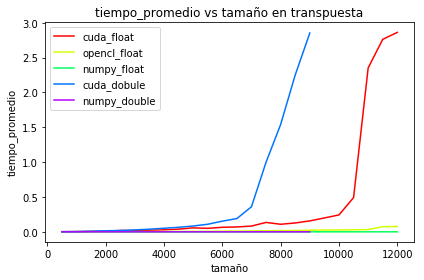

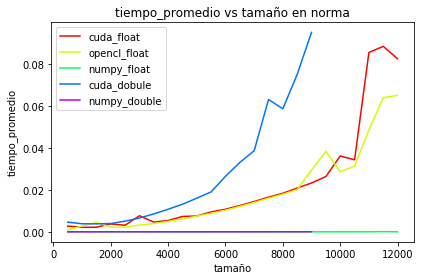

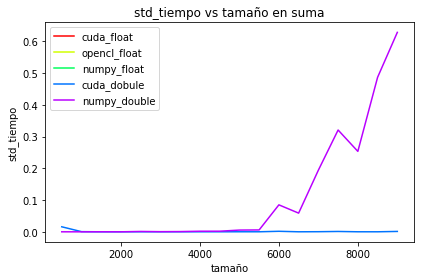

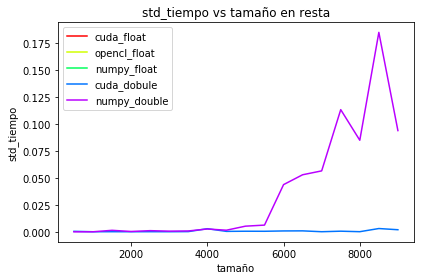

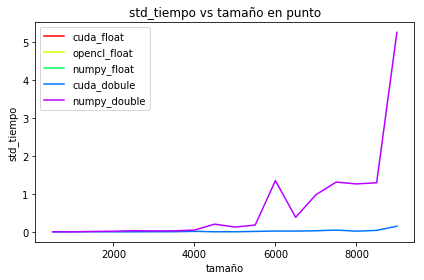

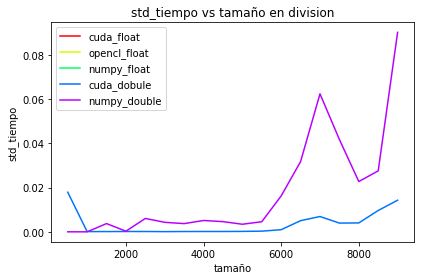

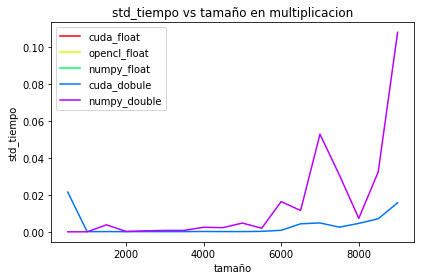

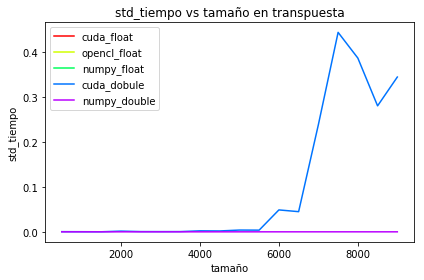

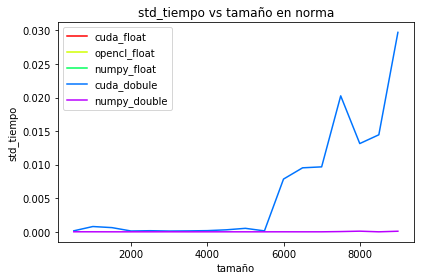

In [6]:
ys = columnas[3:]
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y, plataformas=plataformas)